In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

c:\Users\MANYA\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\MANYA\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\MANYA\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Import data
df = pd.read_csv("medical_examination.csv")

# Add 'overweight' column
df['height'] = df['height']/100
ow = (df['weight']/(df['height']**2))>25 
for i in range(len(ow)):
    if ow[i]==True:
        ow[i]=1
    else :
        ow[i]=0
ow

0        0
1        1
2        0
3        1
4        0
        ..
69995    1
69996    1
69997    1
69998    1
69999    0
Length: 70000, dtype: object

In [3]:
df.head(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0


In [26]:
df.shape

(70000, 14)

In [4]:
df['overweight'] = np.array(ow)

In [5]:
df['overweight'].nunique()

2

In [6]:
df.head(10)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,0
5,8,21914,1,1.51,67.0,120,80,2,2,0,0,0,0,1
6,9,22113,1,1.57,93.0,130,80,3,1,0,0,1,0,1
7,12,22584,2,1.78,95.0,130,90,3,3,0,0,1,1,1
8,13,17668,1,1.58,71.0,110,70,1,1,0,0,1,0,1
9,14,19834,1,1.64,68.0,110,60,1,1,0,0,0,0,1


In [7]:
df['cholesterol'].value_counts()

cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64

In [8]:
df['gluc'].replace(to_replace=[1,3,2], value=[0,1,1,],inplace=True)

In [9]:
df['cholesterol'].replace(to_replace=[1,3,2], value=[0,1,1,],inplace=True)

In [10]:
mdf = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active','overweight'])


In [11]:
mdf

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [12]:
df_cat = mdf.groupby(["cardio", "value"])['variable'].value_counts().reset_index()

In [13]:
df_cat

,cardio,value,variable,count
0,0,0,alco,33080
1,0,0,smoke,31781
2,0,0,gluc,30894
3,0,0,cholesterol,29330
4,0,0,overweight,15915
5,0,0,active,6378
6,0,1,active,28643
7,0,1,overweight,19106
8,0,1,cholesterol,5691
9,0,1,gluc,4127


c:\Users\MANYA\anaconda3\lib\site-packages\seaborn\categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)
c:\Users\MANYA\anaconda3\lib\site-packages\seaborn\categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


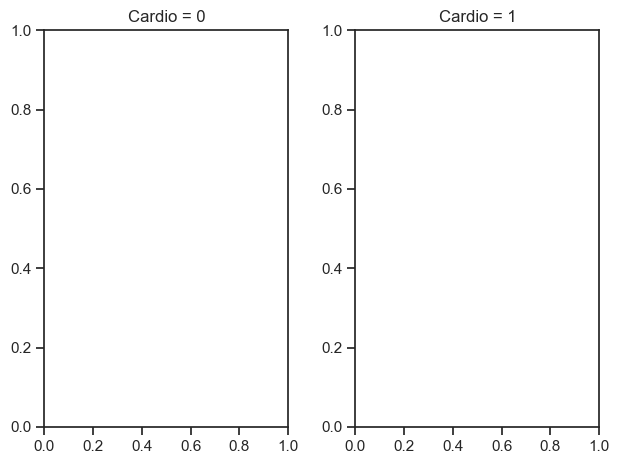

In [18]:
fig1, axs = plt.subplots(1,2)
axs[0].set_title('Cardio = 0')
sns.catplot(x="variable",y="count", data=df_cat[df_cat["cardio"]==0],hue="value", kind="bar", ax=axs[0])

# after scaling
axs[1].set_title('Cardio = 1')
sns.catplot(x="variable",y="count", data=df_cat[df_cat["cardio"]==1],hue="value", kind="bar", ax=axs[1])
plt.close(2)
plt.close(3)
fig1.tight_layout()

In [19]:
mask1 = df['ap_lo'] <= df['ap_hi']
mask2 = df['height'] >= df['height'].quantile(0.025)
mask3 = df['height'] <= df['height'].quantile(0.975)
mask4 = df['weight'] >= df['weight'].quantile(0.025)
mask5 = df['weight'] <= df['weight'].quantile(0.975)
df= df[mask1 & mask2 & mask3 & mask4 & mask5]

In [30]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,1.72,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,1.65,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,1.68,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,1.63,72.0,135,80,0,1,0,0,0,1,1


In [31]:
df.corr()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


<Axes: >

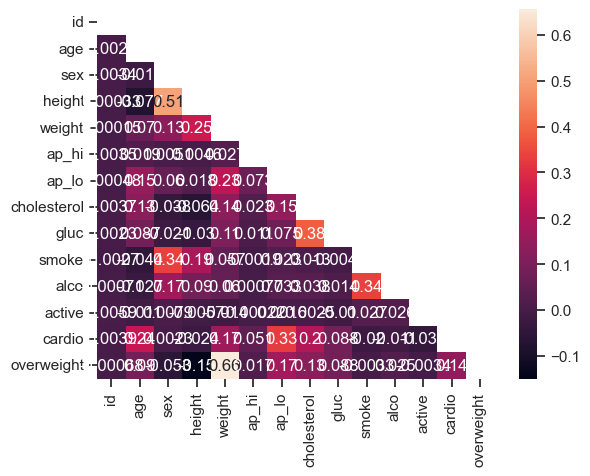

In [33]:
corr= df.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix)